# Prevendo preços de carros


### Neste módulo iremos usar alguns modelos de regressão para prever preços de carros. Além disso iremos calcular métricas para cada um e no final escolher o que melhor prediz os valores evitando o overfitting.

Antes de tudo faremos os imports das bibliotecas que iremos usar por agora

In [1]:
# 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid")
#
dataframe = pd.read_csv(r'D:\Documentos\UFCG\IA\ProjetoPredicao\predicao-precos\true_car_listings.csv')

Seria interessante ter um overview de como está organizado o nosso dataset, para isso vamos printar o nome das colunas:

In [3]:
print(dataframe.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


Ao observar as colunas, avistamos a coluna VIN, esse é o Número de Identificação do Veículo. Esse código serve apenas para própositos de registros. Além disso podemos ter elementos duplicados. Sabendo disto é interessante nós fazermos a primeira filtragem do dataset.

In [3]:
dataframe_filtered = dataframe.drop(['Vin'], axis=1)
dataframe_filtered = dataframe_filtered.drop_duplicates()

Vamos fazer um overview do nosso dataframe filtrado ordenando por preço de forma decrescente com o objetivo de identificar valores muito abaixo ou muito acima, ou seja, outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x273917f2e10>,
 'caps': [<matplotlib.lines.Line2D at 0x27391800550>,
 'boxes': [<matplotlib.lines.Line2D at 0x273917f2c88>],
 'medians': [<matplotlib.lines.Line2D at 0x27391800c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x27391800fd0>],
 'means': []}

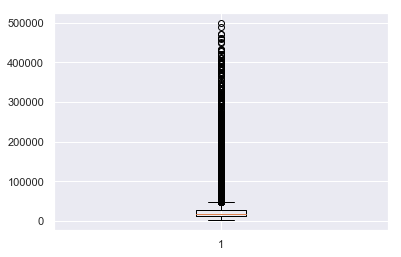

In [5]:
plt.boxplot(dataframe_filtered['Price'])

Com esse gráfico plotado descobrimos 2 coisas:
I) Não temos outliers aparentes
II) A maior parte dos preços são baixos

Questionamento 1: Será que a cidade influencia no preço dos veículos?

Para responder isso vamos plotar o gráfico da média de preços e ver se existe uma variação considerável para saber se a variável City é importante para nós.

{'whiskers': [<matplotlib.lines.Line2D at 0x2739d8261d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2739d8268d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2739d826048>],
 'medians': [<matplotlib.lines.Line2D at 0x2739d826fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2739d5f7390>],
 'means': []}

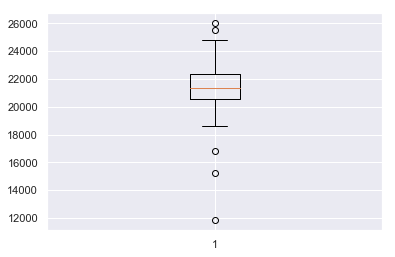

In [18]:
#
df_prices_states = dataframe_filtered[["Price","State"]]
df_prices_states = df_prices_states.groupby("State").mean().reset_index()
df_prices_states = df_prices_states.sort_values(by='Price', ascending=False)

# print(df_prices_states)

plt.boxplot(df_prices_states['Price'])

Observamos que a média de preço dos estados são bem parecidas, logo, inferimos que a média das suas cidades também são parecidas. Com isso podemos retirar as variáveis State e City dos nossos dados.